In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob, re

In [2]:
records = []
for score_filename in glob.glob('scores/*.txt'):
    record = {}
    score_file = open(score_filename, 'r')
    run = re.match('scores/score-(.+).txt', score_filename).group(1)
    record["run"] = run
    for score in score_file.readlines():
        pair = score.strip().split(':')
        record[pair[0]] = float(pair[1])
    records.append(record)


In [3]:
df = pd.DataFrame.from_records(records)
df_agnostic_acc = df[['run', 'agnostic_acc']].sort_values(by='run')
df_agnostic_rho = df[['run', 'agnostic_rho']].sort_values(by='run')
df_aware_acc = df[['run', 'aware_acc']].sort_values(by='run')
df_aware_rho = df[['run', 'aware_rho']].sort_values(by='run')

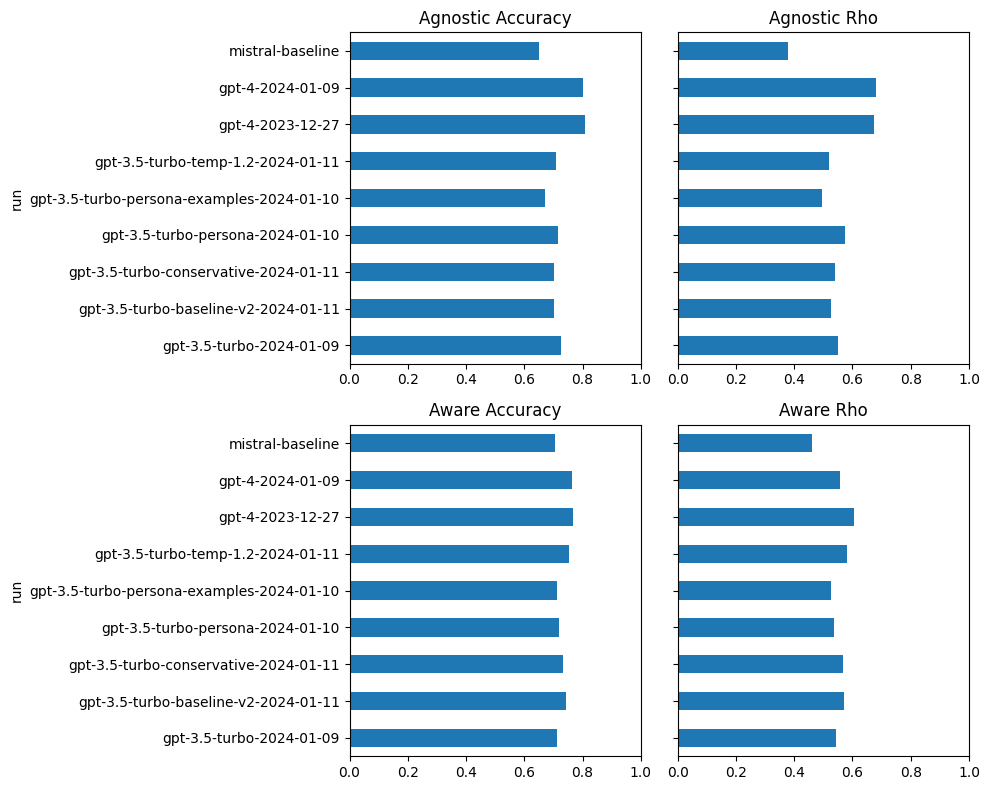

In [4]:
# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plotting each DataFrame on a specific subplot
df_agnostic_acc.plot(kind='barh', x='run', legend=False, ax=axs[0, 0])
axs[0, 0].set_title('Agnostic Accuracy')
axs[0, 0].set_xlim(0, 1)

df_agnostic_rho.plot(kind='barh', legend=False, ax=axs[0, 1])
axs[0, 1].set_title('Agnostic Rho')
axs[0, 1].set_yticklabels([])
axs[0, 1].set_xlim(0, 1)

df_aware_acc.plot(kind='barh', x='run', legend=False, ax=axs[1, 0])
axs[1, 0].set_title('Aware Accuracy')
axs[1, 0].set_xlim(0, 1)

df_aware_rho.plot(kind='barh', legend=False, ax=axs[1, 1])
axs[1, 1].set_title('Aware Rho')
axs[1, 1].set_yticklabels([])
axs[1, 1].set_xlim(0, 1)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [5]:
df = df.set_index('run')

# Define the styling function
def highlight_max(s):
    '''
    Highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

# Apply the styling to the DataFrame
styled_df = df.style.apply(highlight_max)

# Display the styled DataFrame
styled_df


,aware_acc,aware_rho,agnostic_acc,agnostic_rho
run,,,,
gpt-3.5-turbo-conservative-2024-01-11,0.734531,0.568859,0.701403,0.540491
gpt-4-2023-12-27,0.768463,0.605437,0.807615,0.673998
gpt-3.5-turbo-baseline-v2-2024-01-11,0.742515,0.569994,0.701403,0.526440
gpt-3.5-turbo-2024-01-09,0.712575,0.541777,0.725451,0.549040
gpt-4-2024-01-09,0.762475,0.555941,0.801603,0.679521
mistral-baseline,0.706587,0.460958,0.649299,0.380141
gpt-3.5-turbo-temp-1.2-2024-01-11,0.752495,0.582654,0.709419,0.519809
gpt-3.5-turbo-persona-examples-2024-01-10,0.712575,0.524608,0.671343,0.493688
gpt-3.5-turbo-persona-2024-01-10,0.720559,0.535034,0.715431,0.575568
